# Chapter 6. 첫 심층 신경망 만들기
# : 역전파를 소개합니다.
### 신호등 문제
#### 이 가상의 문제를 통해 신경망이 전체 데이터셋을 학습하는 방법을 고찰한다.
외국에서 처음 본 신호등을 본다면 언제 건너야 하는지 파악하기 힘들 것이다.
어떤 신호 조합이 "보행 신호"인지, 어떤 조합이 "정지 신호"인지 알려면 지나가는 사람을 따라 건너거나, 길목에서 잠시 지나가는 사람들을 관찰한 다음 그들의 행동과 신호 등 사이의 관계를 파악해야 한다.

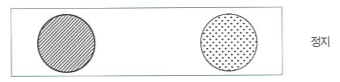
- 이 신호에서는 아무도 건너지 않았다.

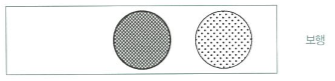
- 지금까지 보면 오른쪽 전구는 정지나 보행 신호 중 어느 쪽에도 영향을 주지 않는다는 것을 알 수 있다.

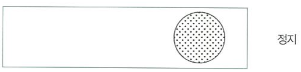
- '가운데 전구에 불이 들어오면 길을 건너기에 안전하다'라는 결론을 잠정적 결론을 낼 수 있다.

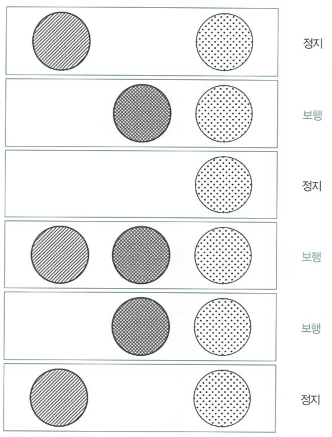
지금까지 우리는 개별 데이터의 전수 관측과 상관관계 탐색을 통해 이 패턴을 학습하였다. 이것이 바로 신경망 학습을 통해서 하고자 하는 일이다.

### 데이터 준비하기
#### 신경망은 신호등을 읽지 못합니다.
앞에서 한 것이 지도 학습 알고리즘.
지도학습 => 데이터셋을 취해서 다른 데이터셋으로 변환할 수 있다.
/ !알고 있는 데이터셋을 취해서 알고자 하는 데이터셋으로 변환할 수 있다.!(중요)

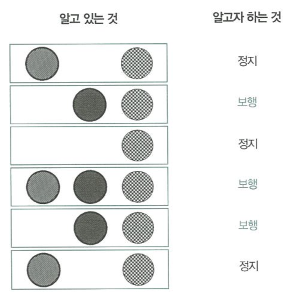
어떤 데이터셋 (신호등과 정지-보행 여부)이 어떤 그룹 (알고 있는 것과 알고자 하는 것)에 속하는지를 바꾸면 역방향 학습도 가능.

### 행렬과 행렬 관계
#### 신호등을 수학적으로 표현하세요.
우리는 신경망이 신호등 패턴을 정지-보행 패턴으로 전확히 번역하도록 가르쳐야 한다.
- !패턴에 집중합시다! 
- 신호등 패턴을 숫자의 형태로 모사하는 것이 필요.
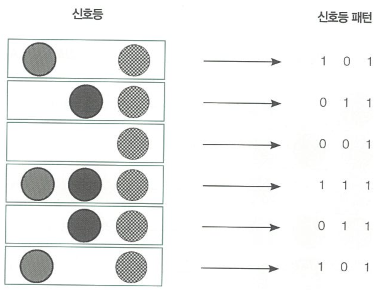

데이터 행렬에서는 각 기록 샘플에 개별 행을, 각 기록 항목에 개별 열을 부여하는 것이 관례이다.  
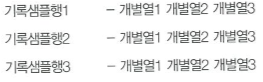

#### 우수한 데이터 행렬은 외부 세게를 완벽히 모사한다.
신호등에 밝기 조절 장치가 있어서 밝기를 제어할 수 있다면 데이터는 아래처럼 기록될 수 있다.
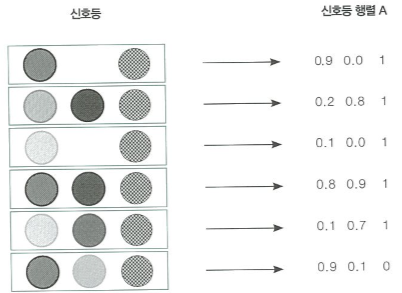

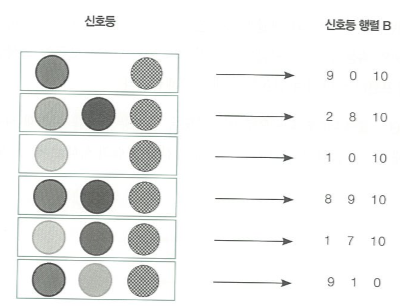
(행렬 A) * 10 == (행렬 B)
- 이들 행렬이 서로에 대해 '스칼라 배수'인 것.

#### 행렬 A와 B 모두 동일한 기저 패턴을 담고 있다.
행렬의 데이터셋 안에 있는 신호등 패턴을 완벽히 반영하는 행렬이 무한히 존재한다.
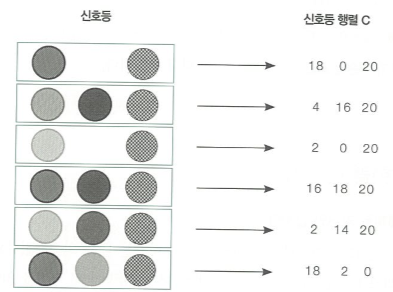

기저 패턴과 행렬이 동일한 것이 아니라는 사실을 인지하는 것이 중요하다.
패턴은 이들 행렬 각각이 표현하는 바(속성)이며 신호등 안에도 존재한다.

입력 데이터 패턴은 출력 데이터 패턴으로 변환하도록 신경망을 학습시킬 때 사용한다. 
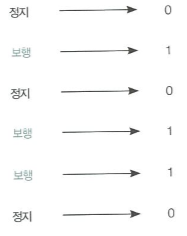
1과 0을 바꿔도 출력 행렬은 여전히 정지-보행 패턴을 잘 포착한다.
행렬을 정지-보행 기록으로 또는 정지-보행 기록을 행렬로 완벽히 변환할 수 있기 때문에 이 결과를 행렬을 '무손실 표현'이라고 부른다.

### 파이썬으로 행렬 만들기
#### 행렬을 파이썬 세계로 가져와 봅시다.

In [1]:
import numpy as np
streetlights = np.array([[1, 0, 1],
                        [0, 1, 1],
                        [0, 0, 1],
                        [1, 1, 1],
                        [0, 1, 1],
                        [1, 0, 1,]])

In [2]:
walk_vs_stop = np.array([[0],
                       [1],
                       [0],
                       [1],
                       [1],
                       [0]])

### 신경망 구축하기
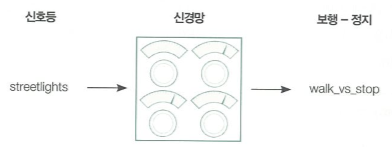

In [8]:
import numpy as np
weights = np.array([0.5, 0.48, -0.7])
alpha = 0.1

streetlights = np.array([[1, 0, 1 ],
                        [0, 1, 1],
                        [0, 0, 1],
                        [1, 1, 1],
                        [0, 1, 1],
                        [1, 0, 1]])

walk_vs_stop = np.array([0, 1, 0, 1, 1, 0])

input = streetlights[0]
goal_prediction = walk_vs_stop[0]

for iteration in range(20):
    prediction = input.dot(weights)
    error = (goal_prediction - prediction) ** 2
    delta = prediction - goal_prediction
    weights = weights - (alpha * (input * delta))
    
    print("Error:" + str(error) + "   " + "Prediction:" + str(prediction))

Error:0.03999999999999998   Prediction:-0.19999999999999996
Error:0.025599999999999973   Prediction:-0.15999999999999992
Error:0.01638399999999997   Prediction:-0.1279999999999999
Error:0.010485759999999964   Prediction:-0.10239999999999982
Error:0.006710886399999962   Prediction:-0.08191999999999977
Error:0.004294967295999976   Prediction:-0.06553599999999982
Error:0.002748779069439994   Prediction:-0.05242879999999994
Error:0.0017592186044416036   Prediction:-0.04194304000000004
Error:0.0011258999068426293   Prediction:-0.03355443200000008
Error:0.0007205759403792803   Prediction:-0.02684354560000002
Error:0.0004611686018427356   Prediction:-0.021474836479999926
Error:0.0002951479051793508   Prediction:-0.01717986918399994
Error:0.00018889465931478573   Prediction:-0.013743895347199997
Error:0.00012089258196146188   Prediction:-0.010995116277759953
Error:7.737125245533561e-05   Prediction:-0.008796093022207963
Error:4.951760157141604e-05   Prediction:-0.007036874417766459
Error:3.169

In [5]:
import numpy as np

a = np.array([0, 1, 2, 1])
b = np.array([2, 2, 2, 3])

print(a * b)
print(a + b)
print(a * 0.5)
print(a + 0.5)

[0 2 4 3]
[2 3 4 4]
[0.  0.5 1.  0.5]
[0.5 1.5 2.5 1.5]


### 전체 데이터셋 학습하기
#### 신경망은 지금까지 신호등 기록 하나만 학습했다. 신호등 기록 전체를 학습하고 싶은가?

In [7]:
import numpy as np

weights = np.array([0.5, 0.48, -0.7])
alpha = 0.1

streetlights = np.array([[1, 0, 1 ],
                        [0, 1, 1],
                        [0, 0, 1],
                        [1, 1, 1],
                        [0, 1, 1],
                        [1, 0, 1]])

walk_vs_stop = np.array([0, 1, 0, 1, 1, 0])

input = streetlights[0]
goal_prediction = walk_vs_stop[0]

for iteration in range(40):
    error_for_all_lights = 0
    for row_index in range(len(walk_vs_stop)):
        input = streetlights[row_index]
        goal_prediction = walk_vs_stop[row_index]
        
        prediction = input.dot(weights)
        
        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error
        
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input * delta))
        print("Prediction:" + str(prediction))
        
    print("Error:" + str(error_for_all_lights) + "\n")

Prediction:-0.19999999999999996
Prediction:-0.19999999999999996
Prediction:-0.5599999999999999
Prediction:0.6160000000000001
Prediction:0.17279999999999995
Prediction:0.17552
Error:2.6561231104

Prediction:0.14041599999999999
Prediction:0.3066464
Prediction:-0.34513824
Prediction:1.006637344
Prediction:0.4785034751999999
Prediction:0.26700416768
Error:0.9628701776715985

Prediction:0.213603334144
Prediction:0.5347420299776
Prediction:-0.26067345110016
Prediction:1.1319428845096962
Prediction:0.6274723921901568
Prediction:0.25433999330650114
Error:0.5509165866836797

Prediction:0.20347199464520088
Prediction:0.6561967149569552
Prediction:-0.221948503950995
Prediction:1.166258650532124
Prediction:0.7139004922542389
Prediction:0.21471099528371604
Error:0.36445836852222424

Prediction:0.17176879622697283
Prediction:0.7324724146523222
Prediction:-0.19966478845083285
Prediction:1.1697769945341199
Prediction:0.7719890116601171
Prediction:0.17297997428859369
Error:0.2516768662079895

Predictio